In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pickle 
import re
import os

from PIL import Image


# Sample data dictionary (replace this with your actual data)

llm = '7bF'

data = pickle.load(open(os.path.join("../pgg/", llm+"-results-pgg.txt"), "rb" ))

# data type
print(type(data))

# data info
print(data.keys())

print(len(data['poolparty']))

<class 'dict'>
dict_keys(['poolparty'])
600


In [80]:
# check for invalid values
for key in data.keys():
    for item in data[key]:
        # if item != '  C' and item != '  D':
            print(key, item)

poolparty   As Alex, my choice of donation is 7. I believe that contributing $7 will result in a good balance between enjoying the party and also ensuring that the total amount raised is sufficient to provide a quality experience for everyone involved. While I could potentially contribute more, I feel that $7 is a reasonable amount that will allow me to reap some benefits from the party while also being mindful of the overall costs and goals of the event.
poolparty   As Alex, my choice of donation is 7. I believe that contributing $7 will result in a good balance between enjoying the party and also ensuring that the total amount raised is sufficient to provide a quality experience for everyone involved. While I could potentially contribute more, I feel that $7 is a reasonable amount that will allow me to reap some benefits from the party while also being mindful of the overall costs and goals of the event.
poolparty   As Alex, I would like to donate $7 to the party fund. This choice is

In [81]:
def get_amount_from_text(text):
    return int(re.search(r'\d+', text).group())

def remove_odd_index_values(data):
    # remove odd index values and only keep even index values
    for key in data.keys():
        data[key] = data[key][::2]
    return data

key = 'poolparty'
numeric_data = {}
numeric_data[key] = []
for item in data[key]:
    numeric_data[key].append(get_amount_from_text(item))
        
numeric_data = remove_odd_index_values(numeric_data)


{7: 138, 5: 162}


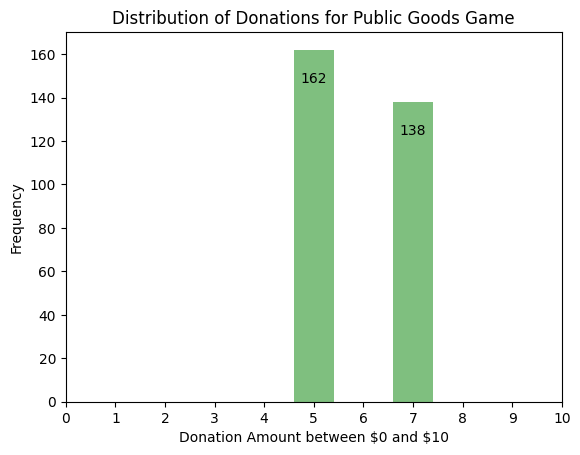

Average donation:  5.92


In [82]:
def get_the_distribution_of_a_list(list):
    distribution = {}
    for item in list:
        if item in distribution:
            distribution[item] += 1
        else:
            distribution[item] = 1
    return distribution

def plot_the_distribution(distribution):
    print(distribution)
    # make xsticks only integers between 0 and 10
    
    # create a bar chart with xticks from 0 to 10
    plt.bar(distribution.keys(), distribution.values(), color='g', alpha=0.5)
    plt.xticks(np.arange(0, 11, 1.0))
    
    # write the y value on top of the bar
    for key, value in distribution.items():
        plt.text(key, value-15, str(value), ha='center')
    
    plt.title('Distribution of Donations for Public Goods Game')
    plt.xlabel('Donation Amount between \$0 and \$10')
    plt.ylabel('Frequency')
    plt.savefig(os.path.join("../pgg_figs/", llm+"-results-pgg.png"))
    plt.show()
        
donation_distribution = get_the_distribution_of_a_list(numeric_data[key])
plot_the_distribution(donation_distribution)

# print average donation
print("Average donation: ", sum(numeric_data[key])/len(numeric_data[key]))

In [ ]:
# create a function to show the distribution of the data
# return a dictionary, with keys as the keys of the input dictionary, and values as the distribution of the data
def show_distribution(data):
    distribution = {}
    for key in data.keys():
        distribution[key] = {}
        for item in data[key]:
            if item not in distribution[key]:
                distribution[key][item] = 1
            else:
                distribution[key][item] += 1
    return distribution

# show the distribution of the data
distribution = show_distribution(data)

# save the distribution to a .txt file
with open(os.path.join("../oos_game/", llm+"_distribution.txt"), "x") as f:
    for key in distribution.keys():
        # write each line like this: key: {item1: count1, item2: count2}
        f.write(key + ': ' + str(distribution[key]) + '\n')

print('Distribution saved to ' + llm + '_distribution.txt')

In [16]:
# read dictionary from .txt file
def read_distribution(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()
    distribution = {}
    for line in lines:
        # each line is like this: key: {item1: count1, item2: count2}
        # first, split by the first ': ' to get the key
        # then, split by the '{' and '}' to get the value
        key, value = line.split(': {')
        value = value[0:-2].split(', ')
        value = {item.split(': ')[0][1:-1]: int(item.split(': ')[1]) for item in value}
        distribution[key] = value
    return distribution

# show the distribution
# print(distribution)

all_data = {}
llms = ['7b-fixed', '7b-fined', '70b-fixed']
for llm in llms:
    distribution = read_distribution(os.path.join("../oos_game", llm+"_distribution.txt"))
    all_data[llm] = distribution
    
# save the all_data dictionary to a .txt file
with open(os.path.join("../oos_game", "all_data_reasoning.txt"), "w") as f:
    f.write(str(all_data))
    
print('All data saved to all_data.txt')

# save to a .pkl file
pickle.dump(all_data, open(os.path.join("../oos_game", "all_data_reasoning.pkl"), "wb"))

print('All data saved to all_data.pkl')

All data saved to all_data.txt
All data saved to all_data.pkl


In [57]:
def compare_distribution_for_each_game(all_data, game):
    plt.figure()
    bar_width = 0.2  # Width of each bar
    bar_positions = []  # List to store the x positions of bars

    for index, llm in enumerate(all_data.keys()):
        valid_keys = all_data[llm][game].keys()
        # Generate x positions for bars
        x = [pos + bar_width * index for pos in range(len(valid_keys))]
        bar_positions.append(x)
        # color = 'b' if llm == '7b_org' else 'orange' if llm == '7b_finetuned' else 'red'
        color = 'blue' if llm == '7b-fixed' else 'orange' if llm == '7b-fined' else 'green'
        plt.bar(x, all_data[llm][game].values(), width=bar_width, alpha=0.5, label=llm, color=color)

    # Adjust xticks to the middle of the grouped bars
    plt.xticks([pos + bar_width * (len(all_data) - 1) / 2 for pos in range(len(valid_keys))], valid_keys)

    plt.xlabel(game)
    plt.ylabel('Count')
    plt.title(game + ' distribution')
    plt.legend()
    plt.show()

# compare the distribution of different models
def compare_distribution(all_data, keys):
    for key in keys:
        compare_distribution_for_each_game(all_data, key)
        print(key)

# compare the distribution of different models
keys = [item for item in data.keys()]
print(keys)
compare_distribution(all_data, keys)

['team_prison_oos', 'team_delight_oos', 'team_staghunt_oos', 'team_snowdrift_oos', 'IR_prison_oos', 'IR_delight_oos', 'IR_staghunt_oos', 'IR_snowdrift_oos', 'friendsharing_prison_oos', 'friendsharing_delight_oos', 'friendsharing_staghunt_oos', 'friendsharing_snowdrift_oos', 'biz_prison_oos', 'biz_delight_oos', 'biz_staghunt_oos', 'biz_snowdrift_oos', 'environment_prison_oos', 'environment_delight_oos', 'environment_staghunt_oos', 'environment_snowdrift_oos']


In [83]:
from collections import defaultdict

categorized_keys = defaultdict(list)
for item in keys:
    prefix = item.split('_')[1]  # Get the prefix before the underscore
    categorized_keys[prefix].append(item)
# 0 is for context, 1 is for game

# Extract values from the dictionary to get the list of lists
categorized_keys

defaultdict(list,
            {'prison': ['team_prison_oos',
              'IR_prison_oos',
              'friendsharing_prison_oos',
              'biz_prison_oos',
              'environment_prison_oos'],
             'delight': ['team_delight_oos',
              'IR_delight_oos',
              'friendsharing_delight_oos',
              'biz_delight_oos',
              'environment_delight_oos'],
             'staghunt': ['team_staghunt_oos',
              'IR_staghunt_oos',
              'friendsharing_staghunt_oos',
              'biz_staghunt_oos',
              'environment_staghunt_oos'],
             'snowdrift': ['team_snowdrift_oos',
              'IR_snowdrift_oos',
              'friendsharing_snowdrift_oos',
              'biz_snowdrift_oos',
              'environment_snowdrift_oos']})

In [87]:
def aggregated_comparison_by_category(all_data, category, category_type):
    llms = all_data.keys()
    plt.figure(figsize=(10, 5))
    bar_width = 0.2
    llm_colors = {'7b-fixed': 'blue', '7b-fined': 'orange', '70b-fixed': 'green'}  # Add colors for other LLMs as needed
    legend_handles = []
    
    for index, llm in enumerate(llms):
        distribution = all_data[llm]

        # filter games in distribution that have the context in the name
        valid_games = [game for game in distribution.keys() if category in game]
        
        # set the x positions for bars
        x = [pos + bar_width * index for pos in range(len(valid_games))]
        
        for i, game in enumerate(valid_games):
            # only show the value for key: '  C'
            color = llm_colors[llm]
            # print(llm, game, distribution[game]['  C'], x[i])
            plt.bar(x[i], distribution[game]['  C'], width=bar_width, alpha=0.5, label=game, color=color)
            
        # Add legend entry for current LLM
        legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.5, edgecolor='none'))
    
    # edited valid games should remove its context part if the category is 'Context'
    # edited valid games should remove its game part if the category is 'Game'
    if category_type == 'Game':
        edited_valid_games = [re.sub(r'_.*', '', game) for game in valid_games]
    else:
        # edited_valid_games is a list of strings like a_b_c.
        # We want to remove the first part of the string, and keep the second and third part all together.
        # the initial format is a_b_c, and the final format should be b_c.
        edited_valid_games = [re.sub(r'^[^_]*_', '', game) for game in valid_games]
        
    # print(valid_games)
    print(edited_valid_games)
    valid_games = edited_valid_games
    
    plt.xticks([pos + bar_width * (len(valid_games) - 1) / 3 for pos in range(len(valid_games))], valid_games, fontsize=15)
    # set the xticks size to be larger
    
    category = category + '_oos'
    plt.xlabel(category, fontsize=15)
    plt.ylabel('Cooperation', fontsize=15)
    plt.title(f'{category_type} {category} distribution', fontdict={'fontsize': 16})
    plt.legend(legend_handles, llms, loc='lower right', title='LLM')
    # plt.show()
    # save plot
    if category_type == 'Context':
        plt.savefig(os.path.join("../oos_game_figs/context", category + '_distribution.png'))
    else:
        plt.savefig(os.path.join("../oos_game_figs/game", category + '_distribution.png'))
    plt.close()

for category in categorized_keys:
    print(category)
    aggregated_comparison_by_category(all_data, category, category_type='Game')



prison
['team', 'IR', 'friendsharing', 'biz', 'environment']
delight
['team', 'IR', 'friendsharing', 'biz', 'environment']
staghunt
['team', 'IR', 'friendsharing', 'biz', 'environment']
snowdrift
['team', 'IR', 'friendsharing', 'biz', 'environment']


In [88]:
def merge_images(folder_path, output_path):
    # merge three .png files into one .png file, using the following layout:
    # 1 2
    #  3
    # 4 5

    # get all the .png files in the folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    files.sort()
    
    # open all the images
    images = [Image.open(os.path.join(folder_path, f)) for f in files]
    
    # get the size of the images
    width, height = images[0].size
    total_width = 2 * width
    total_height = 3 * height
    
    # create a new image with the size of the merged image
    new_image = Image.new('RGB', (total_width, total_height))
    
    # paste the images to the new image
    new_image.paste(images[0], (0, 0))
    new_image.paste(images[1], (width, 0))
    new_image.paste(images[2], (width // 2, height))
    new_image.paste(images[3], (0, 2 * height))
    new_image.paste(images[4], (width, 2 * height))
        
    
    # make the empty space in the left and right of the middle image white
    for j in range(height):
        for i in range(width//2):
            new_image.putpixel((i, height + j), (255, 255, 255))
        for i in range(width*3//2, 2*width):
            new_image.putpixel((i, height + j), (255, 255, 255))
       
    # save the new image
    new_image.save(output_path)
    print('Images merged and saved to ' + output_path)

merge_images(os.path.join("../oos_game_figs/context"), os.path.join("../oos_game_figs", "context_distribution.png"))

Images merged and saved to ../oos_game_figs/context_distribution.png


In [89]:
def merge_images_of_four(folder_path, output_path):
    # merge four .png files into one .png file, using the following layout:
    # 1 2
    # 3 4
    
    # get all the .png files in the folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    files.sort()
    
    # open all the images
    images = [Image.open(os.path.join(folder_path, f)) for f in files]
    
    # get the size of the images
    width, height = images[0].size
    total_width = 2 * width
    total_height = 2 * height
    
    # create a new image with the size of the merged image
    new_image = Image.new('RGB', (total_width, total_height))
    
    # paste the images to the new image
    new_image.paste(images[0], (0, 0))
    new_image.paste(images[1], (width, 0))
    new_image.paste(images[2], (0, height))
    new_image.paste(images[3], (width, height))
    
    # save the new image
    new_image.save(output_path)
    print('Images merged and saved to ' + output_path)
    
merge_images_of_four(os.path.join("../oos_game_figs/game"), os.path.join("../oos_game_figs", "game_distribution.png"))

Images merged and saved to ../oos_game_figs/game_distribution.png


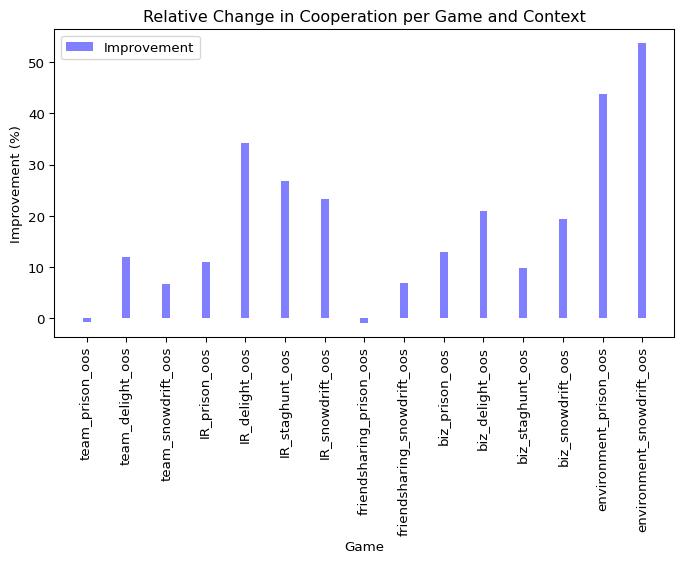

In [65]:
# for each game and context, the goal of finetuning was to reach the results of the 70b model
# so the initial model is 7b_org, the finetuned model is 7b_finetuned, and the target model is 70b
# given this, compare the progress of 7b_org and 7b_finetuned towards 70b by this formula:
# progress = (7b_finetuned - 7b_org) / (70b - 7b_org) * 100

def compare_progress(all_data, new_keys):
    my_dpi = 96
    plt.figure(figsize=(800/my_dpi, 400/my_dpi), dpi=my_dpi)

    # plt.figure(figsize=(10, 5))
    bar_width = 0.2
    bar_positions = []

    progress = [(all_data['7b-fined'][key]['  C'] - all_data['7b-fixed'][key]['  C']) / (all_data['70b-fixed'][key]['  C'] - all_data['7b-fixed'][key]['  C']) * 100 for key in keys]
    x = [pos for pos in range(len(keys))]  
    
    # drop these keys from x and progress
    # environment_staghunt_oos, environment_delight_oos, friendsharing_staghunt_oos, friendsharing_delight_oos
    new_keys.remove('environment_staghunt_oos')
    new_keys.remove('environment_delight_oos')
    new_keys.remove('friendsharing_staghunt_oos')
    new_keys.remove('friendsharing_delight_oos')
    new_keys.remove('team_staghunt_oos')
    progress.pop(keys.index('environment_staghunt_oos'))
    progress.pop(keys.index('environment_delight_oos'))
    progress.pop(keys.index('friendsharing_staghunt_oos'))
    progress.pop(keys.index('friendsharing_delight_oos'))
    progress.pop(keys.index('team_staghunt_oos'))
    
    # set the x positions for bars
    x = [pos for pos in range(len(new_keys))]
    
    
    
          
    plt.bar(x, progress, width=bar_width, alpha=0.5, label='Improvement', color='blue')
    # draw a line at y=100
    # plt.axhline(y=100, color='red', linestyle='--', label='100%')
    # plot logaritmic scale
    # plt.yscale('log')
    # plt.axhline(y=0, color='black', linestyle='--', label='0%')
    plt.xticks([pos for pos in range(len(new_keys))], new_keys, rotation=90)
    plt.xlabel('Game')
    plt.ylabel('Improvement (%)')
    plt.title('Relative Change in Cooperation per Game and Context')
    plt.legend(loc='best')
    # plt.savefig(os.path.join("../oos_game_figs", "improvement.png"), dpi=my_dpi)
    plt.show()
    
new_keys = keys.copy()
compare_progress(all_data, new_keys)

In [42]:
# visualize the progress of 7b_org and 7b_finetuned towards 70b in a table

def compare_progress_table(all_data, keys):
    progress = [(all_data['7b-fined'][key]['  C'] - all_data['7b-fixed'][key]['  C']) / (all_data['70b-fixed'][key]['  C'] - all_data['7b-fixed'][key]['  C']) * 100 for key in keys]
    new_keys = keys.copy()
    # # drop these keys from x and progress
    # # environment_staghunt_oos, environment_delight_oos, friendsharing_staghunt_oos, friendsharing_delight_oos
    # new_keys.remove('environment_staghunt_oos')
    # new_keys.remove('environment_delight_oos')
    # new_keys.remove('friendsharing_staghunt_oos')
    # new_keys.remove('friendsharing_delight_oos')
    # progress.pop(keys.index('environment_staghunt_oos'))
    # progress.pop(keys.index('environment_delight_oos'))
    # progress.pop(keys.index('friendsharing_staghunt_oos'))
    # progress.pop(keys.index('friendsharing_delight_oos'))
    
    # create a table
    table = {}
    table['Game'] = new_keys
    table['Improvement (%)'] = progress
    return table

table = compare_progress_table(all_data, keys)
print(table)

# visualize the table
import pandas as pd

df = pd.DataFrame(table)
df.to_csv(os.path.join("../oos_game_figs", "improvement_table.csv"), index=False)
print('Table saved to improvement_table.csv')

# print the mean and standard deviation of the progress
print('Mean:', df['Improvement (%)'].mean())
print('Median:', df['Improvement (%)'].median())
print('Standard deviation:', df['Improvement (%)'].std())

{'Game': ['team_prison_oos', 'team_delight_oos', 'team_staghunt_oos', 'team_snowdrift_oos', 'IR_prison_oos', 'IR_delight_oos', 'IR_staghunt_oos', 'IR_snowdrift_oos', 'friendsharing_prison_oos', 'friendsharing_delight_oos', 'friendsharing_staghunt_oos', 'friendsharing_snowdrift_oos', 'biz_prison_oos', 'biz_delight_oos', 'biz_staghunt_oos', 'biz_snowdrift_oos', 'environment_prison_oos', 'environment_delight_oos', 'environment_staghunt_oos', 'environment_snowdrift_oos'], 'Improvement (%)': [-0.7246376811594203, 11.940298507462686, -17.857142857142858, 6.756756756756757, 10.95890410958904, 34.12698412698413, 26.865671641791046, 23.214285714285715, -0.8695652173913043, -500.0, 140.0, 6.976744186046512, 12.992125984251967, 20.903954802259886, 9.803921568627452, 19.318181818181817, 43.75, 305.2631578947369, 1533.3333333333335, 53.76344086021505]}
Table saved to improvement_table.csv
Mean: 87.02582077744144
Median: 16.15515390121689
Standard deviation: 367.88220090034105
